# Do the following on titanic dataset.

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

# Qn. 1. Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r'Desktop\ICTK\Case Study # 05 - Data Preprocessing\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Qn. 2. Make ‘PassengerId’ as the index column

In [3]:
df1=df.set_index('PassengerId')
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Qn. 3. Check the basic details of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

# Qn. 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


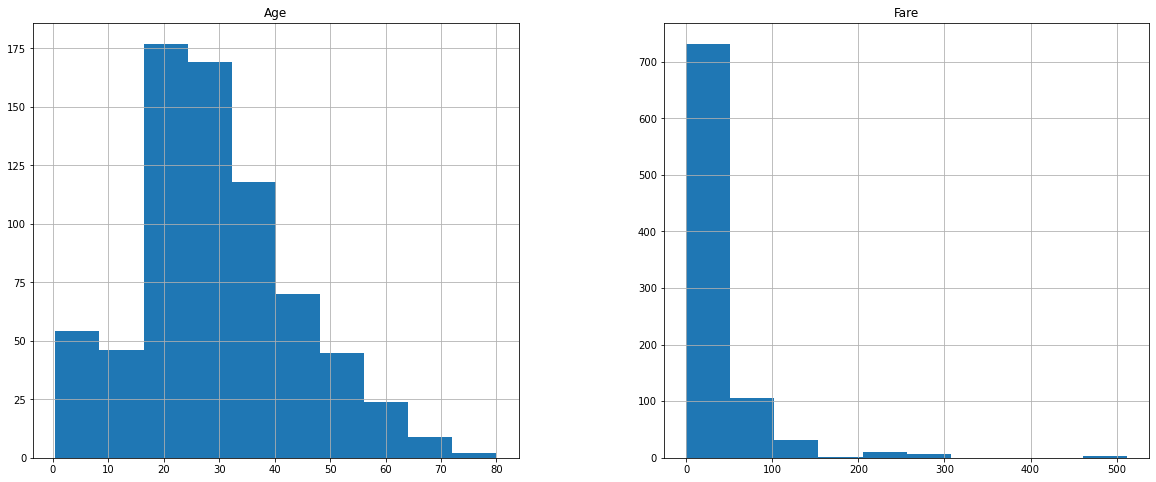

In [9]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,8))
plt.show()

In [10]:
df['Age'].median()

28.0

In [11]:
df['Age'].mean()

29.69911764705882

In [12]:
df['Age']=df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df["Embarked"].fillna(df["Embarked"].mode().iat[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Qn. 5. Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x239f58c81c0>,
 'caps': [<matplotlib.lines.Line2D at 0x239f58c8880>,
 'boxes': [<matplotlib.lines.Line2D at 0x239f58b8e20>],
 'medians': [<matplotlib.lines.Line2D at 0x239f58c8f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x239f58d32e0>],
 'means': []}

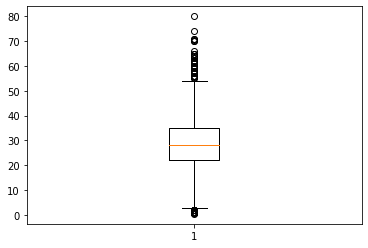

In [14]:
plt.boxplot(df['Age'])

In [15]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

22.0
28.0
35.0
2.5
54.5


In [16]:
outlier=[]
for x in df['Age']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [17]:
ind=df['Age']<low_lim
df.loc[ind].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [18]:
ind1=df['Age']>up_lim
df.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [19]:
df.drop([10, 43, 63, 171, 184, 193, 261, 348, 374, 407, 445, 618, 691, 750,
            850, 869],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x239f596fcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x239f597c3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239f596f940>],
 'medians': [<matplotlib.lines.Line2D at 0x239f597ca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x239f597cdf0>],
 'means': []}

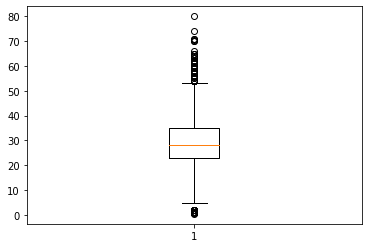

In [20]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x239f59de370>,
 'caps': [<matplotlib.lines.Line2D at 0x239f59dea30>,
 'boxes': [<matplotlib.lines.Line2D at 0x239f59d0fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x239f59e9130>],
 'fliers': [<matplotlib.lines.Line2D at 0x239f59e9490>],
 'means': []}

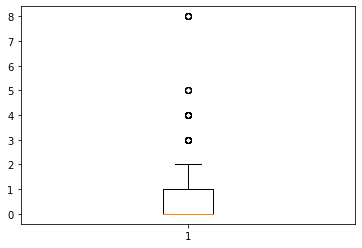

In [21]:
plt.boxplot(df['SibSp'])

In [22]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [23]:
outlier=[]
for x in df['SibSp']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 8]

In [24]:
ind1=df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([  7,  16,  24,  27,  50,  59,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 233, 266, 278, 324, 341, 386, 409, 480,
            485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824,
            846, 863],
           dtype='int64')

In [25]:
df.drop([  7,  16,  24,  27,  50,  59,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 233, 266, 278, 324, 341, 386, 409, 480,
            485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824,
            846, 863],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x239f5944e20>,
 'caps': [<matplotlib.lines.Line2D at 0x239f5a1d1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239f59f3250>],
 'medians': [<matplotlib.lines.Line2D at 0x239f38460d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239efadf7c0>],
 'means': []}

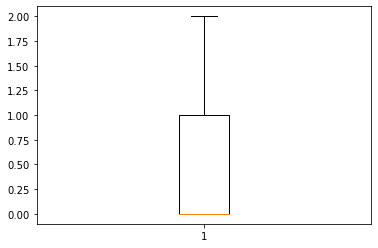

In [26]:
plt.boxplot(df['SibSp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x239f589d7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x239f585c070>,
 'boxes': [<matplotlib.lines.Line2D at 0x239f589d100>],
 'medians': [<matplotlib.lines.Line2D at 0x239f585cca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239f5896e50>],
 'means': []}

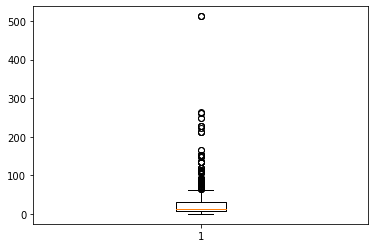

In [27]:
plt.boxplot(df['Fare'])

In [28]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

7.8958
13.0
29.85
-25.0355
62.7813


In [29]:
outlier=[]
for x in df['Fare']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [30]:
ind1=df['Fare']>up_lim
df.loc[ind1].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  97, 102, 118,
            ...
            765, 779, 789, 802, 820, 829, 835, 849, 856, 879],
           dtype='int64', length=108)

In [31]:
df.drop([1, 31, 34, 52, 61, 62, 72, 97, 102, 118, 120, 124, 139, 151, 195, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 336, 337, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 615, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 754, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856, 879],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x239f584c7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x239f5c268b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239f584c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x239f50abdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239f5817280>],
 'means': []}

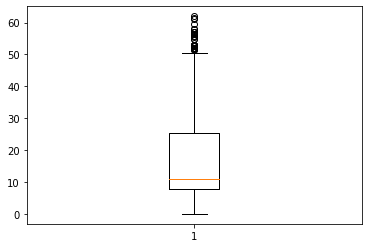

In [32]:
plt.boxplot(df['Fare'])

##### Note: Box plot of 'age', 'sibSp' and 'fare' are plotted and identified outliers are removed.


# Qn. 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [33]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [35]:
df.drop('Ticket',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df=pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,28.0,0,0,8.4583,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
x=df.drop('Survived',axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,...,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,2.458678,29.970041,0.264463,0.268595,16.900573,0.001377,0.001377,0.001377,0.001377,0.001377,...,0.002755,0.002755,0.004132,0.001377,0.001377,0.004132,0.001377,0.155647,0.097796,0.746556
std,0.744877,11.976470,0.499963,0.745214,13.130247,0.037113,0.037113,0.037113,0.037113,0.037113,...,0.052450,0.052450,0.064194,0.037113,0.037113,0.064194,0.037113,0.362771,0.297244,0.435283
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,10.825000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,0.000000,0.000000,25.228125,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,6.000000,61.979200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y=df['Survived']
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x= min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,812,813,814,815,816,817,818,819,820,821
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,...,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,0.729339,0.371325,0.132231,0.044766,0.272681,0.001377,0.001377,0.001377,0.001377,0.001377,...,0.002755,0.002755,0.004132,0.001377,0.001377,0.004132,0.001377,0.155647,0.097796,0.746556
std,0.372439,0.150496,0.249981,0.124202,0.211849,0.037113,0.037113,0.037113,0.037113,0.037113,...,0.052450,0.052450,0.064194,0.037113,0.037113,0.064194,0.037113,0.362771,0.297244,0.435283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.296306,0.000000,0.000000,0.127127,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.174655,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.000000,0.000000,0.407042,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mse is:',mean_squared_error(y_test,predictions))
print('r2 score is:',r2_score(y_test,predictions))

Mse is: 0.14237769606879164
r2 score is: 0.340234137086443


#### Note: MinMaxScaler is applied on the dataset and the following MSE and Rsquare score obtained.
